In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [3]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


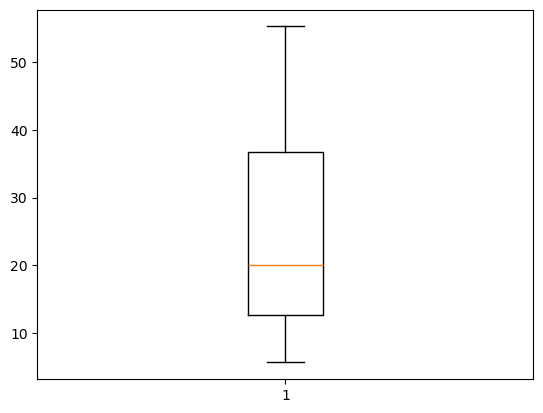

<Figure size 1000x1200 with 0 Axes>

In [6]:
plt.boxplot(df.Marks)
plt.figure(figsize = (10,12))
plt.show()

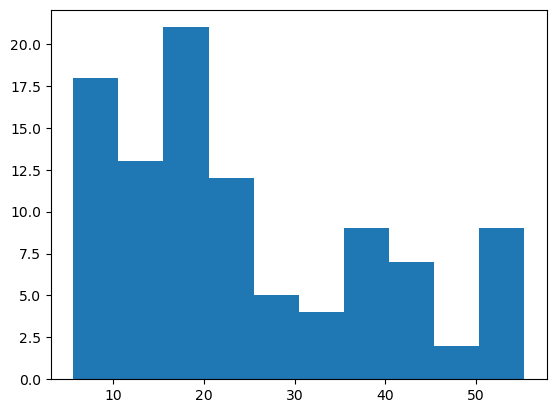

<Figure size 1000x1200 with 0 Axes>

In [7]:
plt.hist(df.Marks)
plt.figure(figsize = (10,12))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Marks', ylabel='Density'>

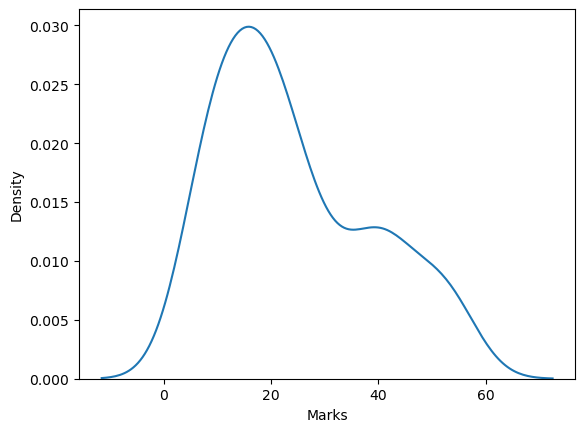

In [8]:
sns.kdeplot(df.Marks)

<Axes: >

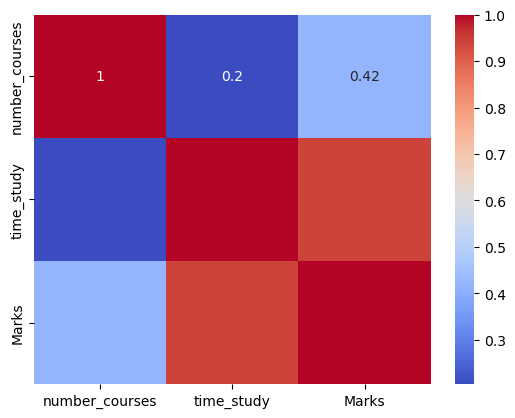

In [9]:
correlation = df.corr()
sns.heatmap(correlation,annot = True,cmap = 'coolwarm')

In [10]:
Y = df['Marks']
X = df.drop('Marks',axis = 1)

X = sm.add_constant(X)

In [11]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)

In [12]:
X_train

,const,number_courses,time_study
55,1.0,7,2.913
88,1.0,5,1.803
26,1.0,7,0.508
42,1.0,6,3.591
69,1.0,6,3.948
...,...,...,...
60,1.0,6,0.376
71,1.0,5,2.518
14,1.0,3,2.908
92,1.0,4,5.027


In [13]:
from sklearn.preprocessing import StandardScaler # fit vs transform vs fit_transfor

In [16]:
lm = LinearRegression()
scaler = StandardScaler()
scaler.fit(X_train,x_test)
xtrain = scaler.transform(X_train)
xtest = scaler.transform(x_test)

In [17]:
lm.fit(X_train,Y_train)

LinearRegression()

In [18]:
lm.score(X_train,Y_train)

0.934351593655942

In [19]:
print(f"The intercept is {lm.intercept_}") # Gives the intercept
print(f"The coefficient is {lm.coef_}") # Gives the coefficient

The intercept is -6.613046733912931
The coefficient is [0.         1.87154988 5.16987176]


In [20]:
model = sm.OLS(Y_train,X_train).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     548.0
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.90e-46
Time:                        00:29:11   Log-Likelihood:                -212.79
No. Observations:                  80   AIC:                             431.6
Df Residuals:                      77   BIC:                             438.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.6130      1.325     -4.992      0.000      -9.251      -3.975
number_courses     1.8715      0.222      8.413      0.000       1.429       2.315
time_study         5.1699      0.169     30.644      0.000       4.834       5.506
==============================================================================
Omnibus:                       26.496   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.809
Skew:                           0.480   Prob(JB):                       0.0202
Kurtosis:                       1.808   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""